In [1]:
import sys
sys.path.append('..')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nhsmasslib.mass import MassSpectrum
from nhsmasslib.mass import VanKrevelen
from nhsmasslib.brutto import brutto_gen

#### Generate brutto formulas which we expect in samples

In [3]:
gdf = brutto_gen(elems={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,3),"S":(0,1)})

#### Loading and assign brutto formules

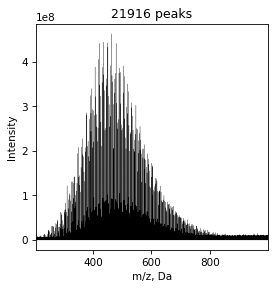

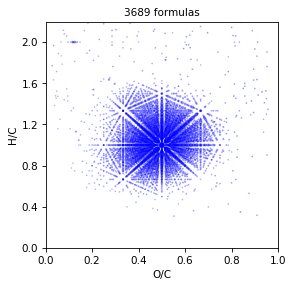

In [4]:
spec2 = MassSpectrum().load(filename="data/sample2.csv",
                            mapper={'m/z':'mass', "I":'intensity'},
                            take_columns=['mass','intensity'],
                            sep=',',
                            )
spec2 = spec2.assign(generated_bruttos_table=gdf, rel_error=0.5)
spec2.draw()
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
vk = VanKrevelen(spec2.table)
vk.draw_scatter(ax=ax)

#### Load assigned mass-list

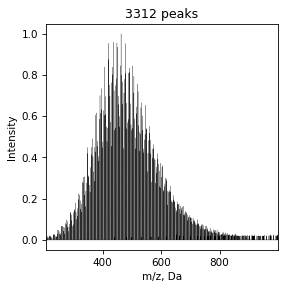

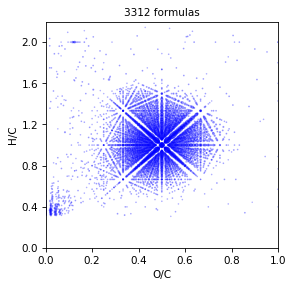

In [5]:
mapper = {"mw": "mass", "relativeAbundance": 'intensity'}
spec1 = MassSpectrum().load("data/sample1.csv",
                            mapper = mapper,
                            sep=',',
                            ignore_columns=["peakNo", "errorPPM", "DBE", "class", "z"]
                           )
spec1.draw()
vk = VanKrevelen(spec1.table).draw_scatter()

#### Search for common formulas

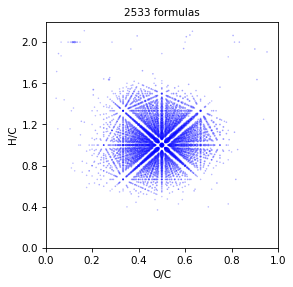

In [6]:
common = spec1 & spec2
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
vk = VanKrevelen(common.table)
vk.draw_scatter(ax=ax)

#### Search for the symmetric difference

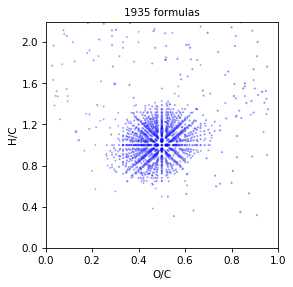

In [7]:
common = spec1 ^ spec2
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
vk = VanKrevelen(common.table)
vk.draw_scatter(ax=ax)

#### Calculate simmetric indexes

In [8]:
for index in ['cosine', 'tanimoto', 'jaccard']:
    value = spec1.calculate_simmilarity(spec2, mode=index)
    print(f'{index}: {round(value,3)} ')

cosine: 0.725 
tanimoto: 0.395 
jaccard: 0.567 
